In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [31]:
df['gender'].unique().tolist()

['Female', 'Male']

## EDA

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [33]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [34]:
df.shape

(7043, 21)

In [35]:
for col in df.iloc[:, :10].columns:
    if col == 'customerID' or col == 'tenure':
        print(f"{col} --> {df[col].head().unique().tolist()}\n")
    else:
        print(f"{col} --> {df[col].unique().tolist()}\n")

customerID --> ['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '9237-HQITU']

gender --> ['Female', 'Male']

SeniorCitizen --> [0, 1]

Partner --> ['Yes', 'No']

Dependents --> ['No', 'Yes']

tenure --> [1, 34, 2, 45]

PhoneService --> ['No', 'Yes']

MultipleLines --> ['No phone service', 'No', 'Yes']

InternetService --> ['DSL', 'Fiber optic', 'No']

OnlineSecurity --> ['No', 'Yes', 'No internet service']



In [36]:
for col in df.iloc[:, 10:].columns:
    if col == 'MonthlyCharges' or col == 'TotalCharges':
        print(f"{col} --> {df[col].head().unique().tolist()}\n")
    else:
        print(f"{col} --> {df[col].unique().tolist()}\n")

OnlineBackup --> ['Yes', 'No', 'No internet service']

DeviceProtection --> ['No', 'Yes', 'No internet service']

TechSupport --> ['No', 'Yes', 'No internet service']

StreamingTV --> ['No', 'Yes', 'No internet service']

StreamingMovies --> ['No', 'Yes', 'No internet service']

Contract --> ['Month-to-month', 'One year', 'Two year']

PaperlessBilling --> ['Yes', 'No']

PaymentMethod --> ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']

MonthlyCharges --> [29.85, 56.95, 53.85, 42.3, 70.7]

TotalCharges --> ['29.85', '1889.5', '108.15', '1840.75', '151.65']

Churn --> ['No', 'Yes']



## Feature Engineering

Convert 'TotalCharges' data type to float

In [37]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [38]:
df[df['TotalCharges'] == ' '][['TotalCharges']].values.tolist()

[[' '], [' '], [' '], [' '], [' '], [' '], [' '], [' '], [' '], [' '], [' ']]

In [39]:
jmlh_string_kosong = len(df[df['TotalCharges'] == ' '][['TotalCharges']].values.tolist())
print(f'Persentase string kosong: {round(jmlh_string_kosong / df.shape[0] * 100, 2)} %')

Persentase string kosong: 0.16 %


In [40]:
df[df['TotalCharges'] == ' '].reset_index(drop=True)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   4472-LVYGI  Female              0     Yes        Yes       0           No   
1   3115-CZMZD    Male              0      No        Yes       0          Yes   
2   5709-LVOEQ  Female              0     Yes        Yes       0          Yes   
3   4367-NUYAO    Male              0     Yes        Yes       0          Yes   
4   1371-DWPAZ  Female              0     Yes        Yes       0           No   
5   7644-OMVMY    Male              0     Yes        Yes       0          Yes   
6   3213-VVOLG    Male              0     Yes        Yes       0          Yes   
7   2520-SGTTA  Female              0     Yes        Yes       0          Yes   
8   2923-ARZLG    Male              0     Yes        Yes       0          Yes   
9   4075-WKNIU  Female              0     Yes        Yes       0          Yes   
10  2775-SEFEE    Male              0      No        Yes       0          Yes   

       MultipleLines InternetService       OnlineSecurity  \
0   No phone service             DSL                  Yes   
1                 No              No  No internet service   
2                 No             DSL                  Yes   
3                Yes              No  No internet service   
4   No phone service             DSL                  Yes   
5                 No              No  No internet service   
6                Yes              No  No internet service   
7                 No              No  No internet service   
8                 No              No  No internet service   
9                Yes             DSL                   No   
10               Yes             DSL                  Yes   

           OnlineBackup     DeviceProtection          TechSupport  \
0                    No                  Yes                  Yes   
1   No internet service  No internet service  No internet service   
2                   Yes                  Yes                   No   
3   No internet service  No internet service  No internet service   
4                   Yes                  Yes                  Yes   
5   No internet service  No internet service  No internet service   
6   No internet service  No internet service  No internet service   
7   No internet service  No internet service  No internet service   
8   No internet service  No internet service  No internet service   
9                   Yes                  Yes                  Yes   
10                  Yes                   No                  Yes   

            StreamingTV      StreamingMovies  Contract PaperlessBilling  \
0                   Yes                   No  Two year              Yes   
1   No internet service  No internet service  Two year               No   
2                   Yes                  Yes  Two year               No   
3   No internet service  No internet service  Two year               No   
4                   Yes                   No  Two year               No   
5   No internet service  No internet service  Two year               No   
6   No internet service  No internet service  Two year               No   
7   No internet service  No internet service  Two year               No   
8   No internet service  No internet service  One year              Yes   
9                   Yes                   No  Two year               No   
10                   No                   No  Two year              Yes   

                PaymentMethod  MonthlyCharges TotalCharges Churn  
0   Bank transfer (automatic)           52.55                 No  
1                Mailed check           20.25                 No  
2                Mailed check           80.85                 No  
3                Mailed check           25.75                 No  
4     Credit card (automatic)           56.05                 No  
5                Mailed check           19.85                 No  
6                Mailed check           25.35                 No  
7                Mailed check   

In [41]:
df = df[df['TotalCharges'] != ' ']
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [14]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [15]:
df[df['tenure'] == 36].head()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
116  9560-BBZXK  Female              0      No         No      36   
338  7982-VCELR  Female              0      No         No      36   
436  4980-URKXC    Male              0     Yes         No      36   
444  1910-FMXJM  Female              0     Yes         No      36   
838  6092-QZVPP    Male              0      No         No      36   

    PhoneService     MultipleLines InternetService       OnlineSecurity  \
116           No  No phone service             DSL                  Yes   
338          Yes                No     Fiber optic                   No   
436          Yes                No              No  No internet service   
444          Yes                No     Fiber optic                   No   
838          Yes                No             DSL                  Yes   

            OnlineBackup     DeviceProtection          TechSupport  \
116                   No                   No                   No   
338                  Yes                   No                   No   
436  No internet service  No internet service  No internet service   
444                   No                   No                   No   
838                   No                  Yes                  Yes   

             StreamingTV      StreamingMovies        Contract  \
116                   No                   No        Two year   
338                  Yes                  Yes  Month-to-month   
436  No internet service  No internet service        One year   
444                   No                  Yes  Month-to-month   
838                  Yes                  Yes  Month-to-month   

    PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
116               No  Bank transfer (automatic)           31.05       1126.35   
338              Yes    Credit card (automatic)           94.80       3565.65   
436               No  Bank transfer (automatic)           20.85        720.05   
444               No           Electronic check           80.40       2937.65   
838              Yes    Credit card (automatic)           79.20       2854.95   

    Churn  
116    No  
338    No  
436    No  
444    No  
838    No

In [16]:
df.drop('customerID', axis=1, inplace=True)

In [17]:
df['MonthlyCharges'].max()

118.75

### Data Distribution

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def dist_col_plot(rows, cols, data):
    fig, axes = plt.subplots(rows, cols, figsize=(16, 8))

    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(data.columns):
            sns.histplot(data=data, x=data.columns[i], ax=ax)
            ax.set_title(data.columns[i], fontsize=14)
            ax.tick_params(axis='x', labelsize=14)
            ax.tick_params(axis='y', labelsize=14)
            ax.set_xlabel("")
            ax.set_ylabel('Count', fontsize=14)
        else:
            ax.set_visible(False)

    plt.tight_layout()
    plt.show()

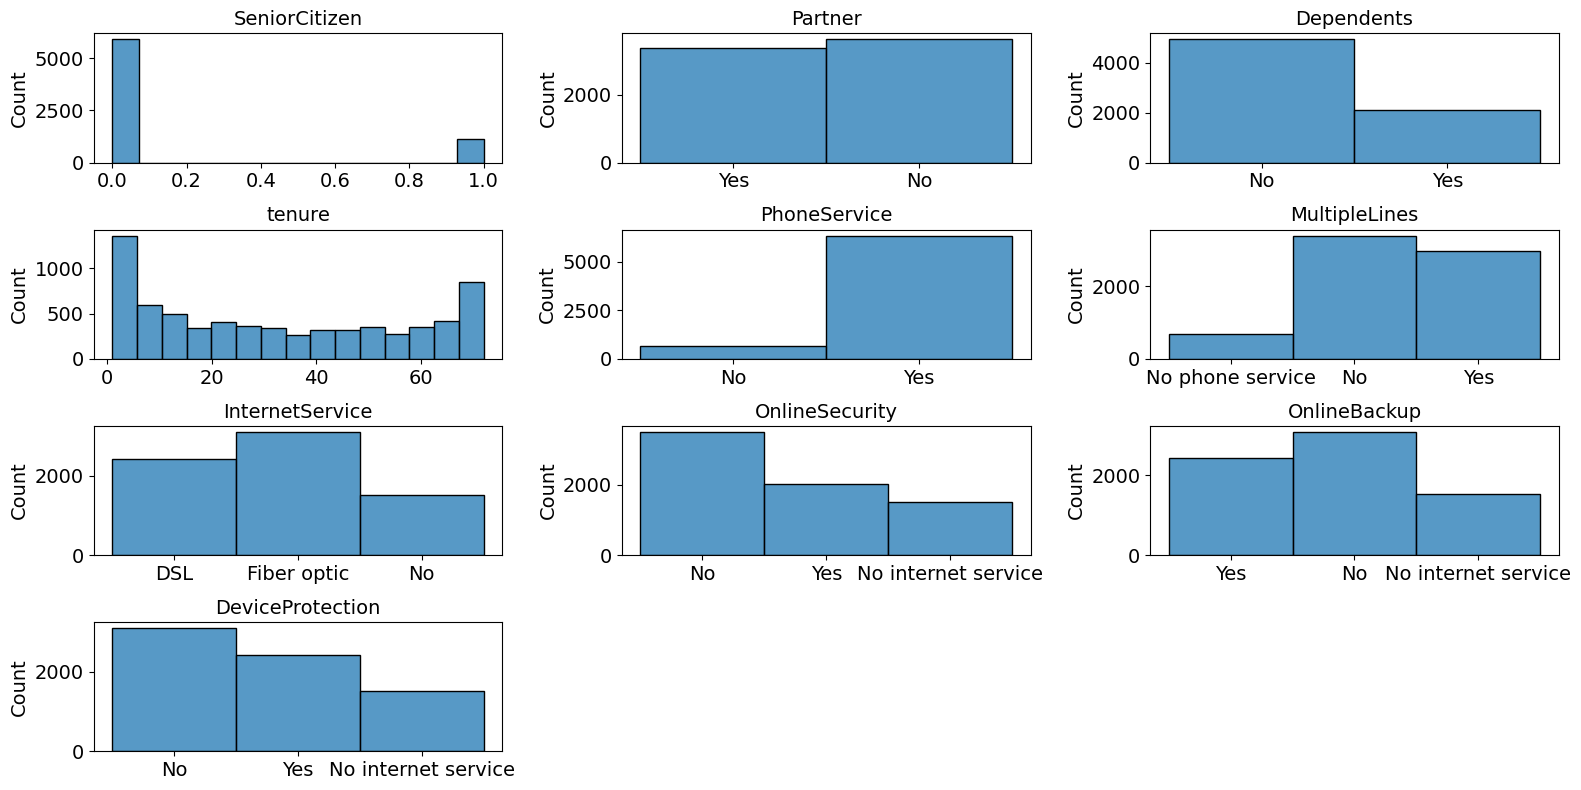

In [19]:
dist_col_plot(rows=4, cols=3, data=df.iloc[:, 1:11])

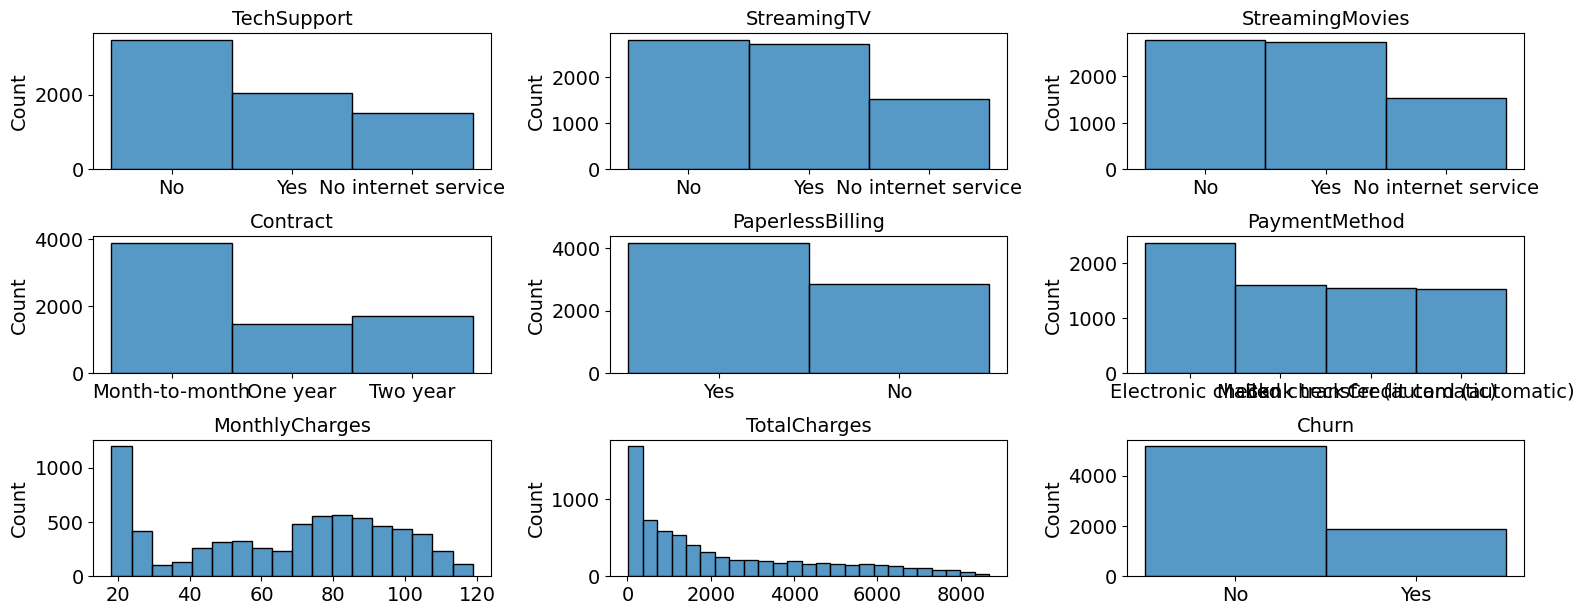

In [20]:
dist_col_plot(rows=4, cols=3, data=df.iloc[:, 11:])

### Checking Outliers

In [21]:
def plot_box(data, labels, title, figsize=(10, 5)):
    sns.set_style("whitegrid")
    plt.figure(figsize=figsize)
    ax = sns.boxplot(data=data, orient='h', showmeans=True)
    ax.set_xlabel('Value', fontsize=14)  # Menambahkan fontsize di sini
    ax.set_title(title, fontsize=14)
    ax.set_yticklabels(labels, fontsize=14)
    ax.tick_params(axis='x', labelsize=14)  # Memperbesar ukuran font pada sumbu x
    plt.show()

In [22]:
df.select_dtypes(exclude='object')

SeniorCitizen  tenure  MonthlyCharges  TotalCharges
0                 0       1           29.85         29.85
1                 0      34           56.95       1889.50
2                 0       2           53.85        108.15
3                 0      45           42.30       1840.75
4                 0       2           70.70        151.65
...             ...     ...             ...           ...
7038              0      24           84.80       1990.50
7039              0      72          103.20       7362.90
7040              0      11           29.60        346.45
7041              1       4           74.40        306.60
7042              0      66          105.65       6844.50

[7032 rows x 4 columns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


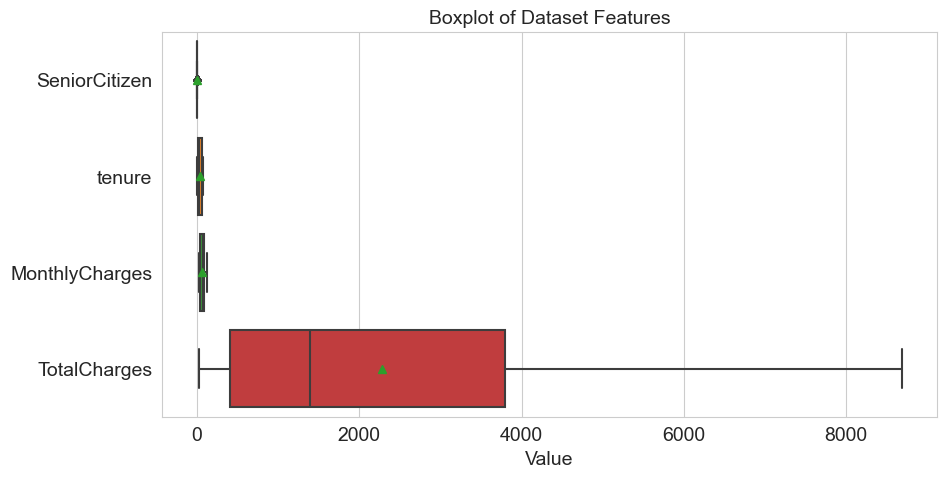

In [24]:
data=df.select_dtypes(exclude='object')

plot_box(data = data,
         labels = data.columns.tolist(),
         title='Boxplot of Dataset Features')

### Label Encoding --> 'Churn' Feature

In [25]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn']) # No : 0 | Yes : 1

In [27]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

In [28]:
mapping_senior_citizen = {
    0: 'No',
    1: 'Yes',
}

df['SeniorCitizen'] = df['SeniorCitizen'].map(mapping_senior_citizen)

In [29]:
df.iloc[:, :5]

gender SeniorCitizen Partner Dependents  tenure
0     Female            No     Yes         No       1
1       Male            No      No         No      34
2       Male            No      No         No       2
3       Male            No      No         No      45
4     Female            No      No         No       2
...      ...           ...     ...        ...     ...
7038    Male            No     Yes        Yes      24
7039  Female            No     Yes        Yes      72
7040  Female            No     Yes        Yes      11
7041    Male           Yes     Yes         No       4
7042    Male            No      No         No      66

[7032 rows x 5 columns]

In [30]:
cols_obj = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=cols_obj)

In [31]:
df.head()

tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  gender_Male  \
0       1           29.85         29.85      0              1            0   
1      34           56.95       1889.50      0              0            1   
2       2           53.85        108.15      1              0            1   
3      45           42.30       1840.75      0              0            1   
4       2           70.70        151.65      1              1            0   

   SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  Partner_Yes  \
0                 1                  0           0            1   
1                 1                  0           1            0   
2                 1                  0           1            0   
3                 1                  0           1            0   
4                 1                  0           1            0   

   Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
0              1               0                1                 0   
1              1               0                0                 1   
2              1               0                0                 1   
3              1               0                1                 0   
4              1               0                0                 1   

   MultipleLines_No  MultipleLines_No phone service  MultipleLines_Yes  \
0                 0                               1                  0   
1                 1                               0                  0   
2                 1                               0                  0   
3                 0                               1                  0   
4                 1                               0                  0   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    1                            0                   0   
1                    1                            0                   0   
2                    1                            0                   0   
3                    1                            0                   0   
4                    0                            1                   0   

   OnlineSecurity_No  OnlineSecurity_No internet service  OnlineSecurity_Yes  \
0                  1                                   0                   0   
1                  0                                   0                   1   
2                  0                                   0                   1   
3                  0                                   0                   1   
4                  1                                   0                   0   

   OnlineBackup_No  OnlineBackup_No internet service  OnlineBackup_Yes  \
0                0                                 0                 1   
1                1                                 0                 0   
2                0                                 0                 1   
3                1                                 0                 0   
4                1                                 0                 0   

   DeviceProtection_No  DeviceProtection_No internet service  \
0                    1                                     0   
1                    0                                     0   
2                    1                                     0   
3                    0                                     0   
4                    1                                     0   

   DeviceProtection_Yes  TechSupport_No  TechSupport_No internet service  \
0                     0               1                                0   
1                     1               1                                0   
2                     0               1                                0   
3                     1               0                                0   
4                     0               1                                0   

   TechSupport_Yes  StreamingTV_No  Stre

### Replace whitespace with underscore

In [32]:
df.columns = df.columns.str.replace(' ', '_')

In [33]:
df.to_csv('df_processed.csv', index=False)

### Scaling 'MonthlyCharges' & 'TotalCharges'

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols = df[['MonthlyCharges', 'TotalCharges', 'tenure']].columns
df[cols] = scaler.fit_transform(df[cols])

In [35]:
df.head()

tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  gender_Male  \
0  0.000000        0.115423      0.001275      0              1            0   
1  0.464789        0.385075      0.215867      0              0            1   
2  0.014085        0.354229      0.010310      1              0            1   
3  0.619718        0.239303      0.210241      0              0            1   
4  0.014085        0.521891      0.015330      1              1            0   

   SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  Partner_Yes  \
0                 1                  0           0            1   
1                 1                  0           1            0   
2                 1                  0           1            0   
3                 1                  0           1            0   
4                 1                  0           1            0   

   Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
0              1               0                1                 0   
1              1               0                0                 1   
2              1               0                0                 1   
3              1               0                1                 0   
4              1               0                0                 1   

   MultipleLines_No  MultipleLines_No_phone_service  MultipleLines_Yes  \
0                 0                               1                  0   
1                 1                               0                  0   
2                 1                               0                  0   
3                 0                               1                  0   
4                 1                               0                  0   

   InternetService_DSL  InternetService_Fiber_optic  InternetService_No  \
0                    1                            0                   0   
1                    1                            0                   0   
2                    1                            0                   0   
3                    1                            0                   0   
4                    0                            1                   0   

   OnlineSecurity_No  OnlineSecurity_No_internet_service  OnlineSecurity_Yes  \
0                  1                                   0                   0   
1                  0                                   0                   1   
2                  0                                   0                   1   
3                  0                                   0                   1   
4                  1                                   0                   0   

   OnlineBackup_No  OnlineBackup_No_internet_service  OnlineBackup_Yes  \
0                0                                 0                 1   
1                1                                 0                 0   
2                0                                 0                 1   
3                1                                 0                 0   
4                1                                 0                 0   

   DeviceProtection_No  DeviceProtection_No_internet_service  \
0                    1                                     0   
1                    0                                     0   
2                    1                                     0   
3                    0                                     0   
4                    1                                     0   

   DeviceProtection_Yes  TechSupport_No  TechSupport_No_internet_service  \
0                     0               1                                0   
1                     1               1                                0   
2                     0               1                                0   
3                     1               0                                0   
4                     0               1                                0   

   TechSupport_Yes  StreamingT

In [36]:
df.to_csv('df_processed.csv', index=False)

In [72]:
df.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Female',
       'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No_phone_service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber_optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No_internet_service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No_internet_service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No_internet_service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No_internet_service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No_internet_service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One_yea

## Classification Modelling

### Finding Top 3 Model

Splitting Data

In [33]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [34]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score

# Initializing Classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'CatBoost': CatBoostClassifier(),
    'LightGBM': LGBMClassifier()
}

# Setting up the parameter grids for each algorithm
param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1.0, 10.0],
                            'penalty': ['l1', 'l2', 'elasticnet'],
                            'solver': ['newton-cg', 'lbfgs', 'liblinear']},
    'Random Forest': {'n_estimators': [50, 100, 150],
                    'max_depth': [None, 10, 20],
                    'max_features': ['auto', 'sqrt', 'log2']},
    'KNN': {'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]},
    'CatBoost': {'iterations': [50, 100, 150],
                'learning_rate': [0.05, 0.1, 0.2],
                'depth': [4, 6, 8],},
    'LightGBM': {'n_estimators': [50, 100, 150],
                'learning_rate': [0.05, 0.1, 0.2],
                'max_depth': [3, 5, 7]}
}

# Setting up multiple GridSearchCV objects, 1 for each algorithm
gridcvs = {}
inner_cv = StratifiedKFold(n_splits=2, shuffle=True)

for name, clf in classifiers.items():
    gcv = GridSearchCV(estimator=clf,
                       param_grid=param_grids[name],
                       scoring='balanced_accuracy',
                       n_jobs=1,
                       cv=inner_cv,
                       verbose=0,
                       refit=True)
    gridcvs[name] = gcv

In [35]:
outer_cv = StratifiedKFold(n_splits=5, shuffle=True)

results = []  # List untuk menyimpan hasil
for name, gs_est in sorted(gridcvs.items()):
    nested_score = cross_val_score(gs_est, 
                                   X=X_train, 
                                   y=y_train, 
                                   cv=outer_cv,
                                   scoring='balanced_accuracy',
                                   n_jobs=1)
    mean_score = nested_score.mean() * 100
    std_score = nested_score.std() * 100
    results.append({'Model': name, 'Mean Outer Balanced Accuracy': mean_score, 'Std Balanced Accuracy': std_score})


0:	learn: 0.6601683	total: 144ms	remaining: 7.08s
1:	learn: 0.6316800	total: 147ms	remaining: 3.52s
2:	learn: 0.6055387	total: 149ms	remaining: 2.34s
3:	learn: 0.5844299	total: 152ms	remaining: 1.74s
4:	learn: 0.5645618	total: 154ms	remaining: 1.38s
5:	learn: 0.5501521	total: 156ms	remaining: 1.14s
6:	learn: 0.5369439	total: 157ms	remaining: 967ms
7:	learn: 0.5235428	total: 159ms	remaining: 837ms
8:	learn: 0.5141547	total: 162ms	remaining: 736ms
9:	learn: 0.5057287	total: 164ms	remaining: 658ms
10:	learn: 0.4983036	total: 167ms	remaining: 590ms
11:	learn: 0.4907363	total: 169ms	remaining: 535ms
12:	learn: 0.4831508	total: 171ms	remaining: 487ms
13:	learn: 0.4775293	total: 173ms	remaining: 446ms
14:	learn: 0.4727701	total: 175ms	remaining: 409ms
15:	learn: 0.4681981	total: 177ms	remaining: 377ms
16:	learn: 0.4633999	total: 180ms	remaining: 349ms
17:	learn: 0.4590954	total: 182ms	remaining: 324ms
18:	learn: 0.4550793	total: 184ms	remaining: 301ms
19:	learn: 0.4521864	total: 186ms	remaini

In [36]:
results_df = pd.DataFrame(results)
results_df.rename(columns={"Mean Balanced Accuracy":"Mean Outer Balanced Accuracy"}, inplace=True)
results_df.sort_values(by='Mean Outer Balanced Accuracy', ascending=False).reset_index(drop=True)

Model  Mean Outer Balanced Accuracy  Std Balanced Accuracy
0  Logistic Regression                     72.724840               0.808391
1             CatBoost                     71.121260               0.551219
2        Random Forest                     71.004599               1.268138
3             LightGBM                     70.984908               0.952217
4                  KNN                     70.964389               0.932617

Fitting model dengan seluruh training set

In [39]:
models_list = ['Logistic Regression', 'CatBoost', 'Random Forest', 'LightGBM', 'KNN']

results = []

for model_name in models_list:
    best_algo = gridcvs[model_name]
    best_algo.fit(X_train, y_train)
    train_acc = balanced_accuracy_score(y_train, best_algo.predict(X_train))
    test_acc = balanced_accuracy_score(y_test, best_algo.predict(X_test))
    
    results.append({
        'Model': model_name,
        'CV Test Fold Balanced Acc. (%)': 100 * best_algo.best_score_,
        'Best Parameters': str(best_algo.best_params_),
        'Training Balanced Accuracy (%)': 100 * train_acc,
        'Test Balanced Accuracy (%)': 100 * test_acc
    })

0:	learn: 0.6611350	total: 16.3ms	remaining: 797ms
1:	learn: 0.6339200	total: 18.9ms	remaining: 454ms
2:	learn: 0.6101340	total: 22ms	remaining: 344ms
3:	learn: 0.5886337	total: 24.2ms	remaining: 278ms
4:	learn: 0.5689024	total: 26.4ms	remaining: 238ms
5:	learn: 0.5552083	total: 30.5ms	remaining: 224ms
6:	learn: 0.5403890	total: 32.7ms	remaining: 201ms
7:	learn: 0.5288581	total: 34.8ms	remaining: 183ms
8:	learn: 0.5171876	total: 36.9ms	remaining: 168ms
9:	learn: 0.5065526	total: 38.9ms	remaining: 156ms
10:	learn: 0.4982022	total: 41.5ms	remaining: 147ms
11:	learn: 0.4901246	total: 44.6ms	remaining: 141ms
12:	learn: 0.4841827	total: 47.2ms	remaining: 134ms
13:	learn: 0.4778193	total: 49.3ms	remaining: 127ms
14:	learn: 0.4725184	total: 51.2ms	remaining: 120ms
15:	learn: 0.4677908	total: 53.2ms	remaining: 113ms
16:	learn: 0.4639549	total: 55.4ms	remaining: 108ms
17:	learn: 0.4595518	total: 57.5ms	remaining: 102ms
18:	learn: 0.4559734	total: 60.3ms	remaining: 98.4ms
19:	learn: 0.4517887	to

In [40]:
results_df = pd.DataFrame(results)
results_df

Model  CV Test Fold Balanced Acc. (%)  \
0  Logistic Regression                       72.719190   
1             CatBoost                       72.536228   
2        Random Forest                       71.183184   
3             LightGBM                       71.657500   
4                  KNN                       72.154704   

                                     Best Parameters  \
0  {'C': 10.0, 'penalty': 'l1', 'solver': 'liblin...   
1  {'depth': 4, 'iterations': 150, 'learning_rate...   
2  {'max_depth': 10, 'max_features': 'sqrt', 'n_e...   
3  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...   
4  {'n_neighbors': 13, 'p': 2, 'weights': 'uniform'}   

   Training Balanced Accuracy (%)  Test Balanced Accuracy (%)  
0                       72.932106                   71.591860  
1                       73.340712                   70.476357  
2                       81.052241                   69.918605  
3                       74.368935                   71.567829  
4                       73.399334                   69.799612

In [42]:
results_df['Best Parameters'].unique().tolist()

["{'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}",
 "{'depth': 4, 'iterations': 150, 'learning_rate': 0.05}",
 "{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}",
 "{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}",
 "{'n_neighbors': 13, 'p': 2, 'weights': 'uniform'}"]

## Interpretable Machine Learning Model 

In [34]:
from sklearn import metrics, ensemble, tree, inspection, model_selection
import shap
from pdpbox import pdp, info_plots

In [37]:
best_lrc = LogisticRegression(C=10.0, penalty='l1', solver='liblinear').fit(X_train, y_train)
best_cbc = CatBoostClassifier(depth=4, iterations=150, learning_rate=0.05).fit(X_train, y_train)
# best_rfc = RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=100).fit(X_train, y_train)
best_lgbm = LGBMClassifier(learning_rate=0.2, max_depth=3, n_estimators=50).fit(X_train, y_train)
# best_knn = KNeighborsClassifier(n_neighbors=13, p=2, weights='uniform').fit(X_train, y_train)

0:	learn: 0.6601432	total: 87.8ms	remaining: 13.1s
1:	learn: 0.6324816	total: 90.4ms	remaining: 6.69s
2:	learn: 0.6084630	total: 93.4ms	remaining: 4.58s
3:	learn: 0.5872573	total: 96.8ms	remaining: 3.53s
4:	learn: 0.5715007	total: 99.5ms	remaining: 2.88s
5:	learn: 0.5575138	total: 102ms	remaining: 2.45s
6:	learn: 0.5456047	total: 105ms	remaining: 2.14s
7:	learn: 0.5346532	total: 107ms	remaining: 1.9s
8:	learn: 0.5234696	total: 110ms	remaining: 1.73s
9:	learn: 0.5134494	total: 113ms	remaining: 1.58s
10:	learn: 0.5049078	total: 116ms	remaining: 1.46s
11:	learn: 0.4972763	total: 118ms	remaining: 1.36s
12:	learn: 0.4895568	total: 120ms	remaining: 1.27s
13:	learn: 0.4829939	total: 123ms	remaining: 1.2s
14:	learn: 0.4774021	total: 127ms	remaining: 1.14s
15:	learn: 0.4723278	total: 130ms	remaining: 1.08s
16:	learn: 0.4671561	total: 133ms	remaining: 1.04s
17:	learn: 0.4626368	total: 136ms	remaining: 997ms
18:	learn: 0.4590159	total: 140ms	remaining: 963ms
19:	learn: 0.4559495	total: 144ms	rema

In [41]:
import joblib

joblib.dump(best_lrc, 'model.joblib')

['model.joblib']

### PDP - PaymentMethod

In [37]:
payment_method_features = ['PaymentMethod_Bank_transfer_(automatic)', 'PaymentMethod_Credit_card_(automatic)', 'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check']

predict_plot = info_plots.PredictPlot(
    model=best_lrc, df=X_test, feature_name="PaymentMethod", n_classes=1,
    model_features=X_test.columns, feature=payment_method_features
)
fig, _, _ = predict_plot.plot()
fig.show()

obtain pred_func from the provided model.


In [38]:
payment_method_features = ['PaymentMethod_Bank_transfer_(automatic)', 'PaymentMethod_Credit_card_(automatic)', 'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check']

predict_plot = info_plots.PredictPlot(
    model=best_cbc, df=X_test, feature_name="PaymentMethod", n_classes=1,
    model_features=X_test.columns, feature=payment_method_features
)
fig, _, _ = predict_plot.plot()
fig.show()

obtain pred_func from the provided model.


In [39]:
payment_method_features = ['PaymentMethod_Bank_transfer_(automatic)', 'PaymentMethod_Credit_card_(automatic)', 'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check']

predict_plot = info_plots.PredictPlot(
    model=best_lgbm, df=X_test, feature_name="PaymentMethod", n_classes=1,
    model_features=X_test.columns, feature=payment_method_features
)
fig, _, _ = predict_plot.plot()
fig.show()

obtain pred_func from the provided model.


#### SHAP Beeswarm Plot

In [ ]:
# shap.plots.beeswarm(lgbm_shap[:,:,1], max_display=15)

##### LightGBM

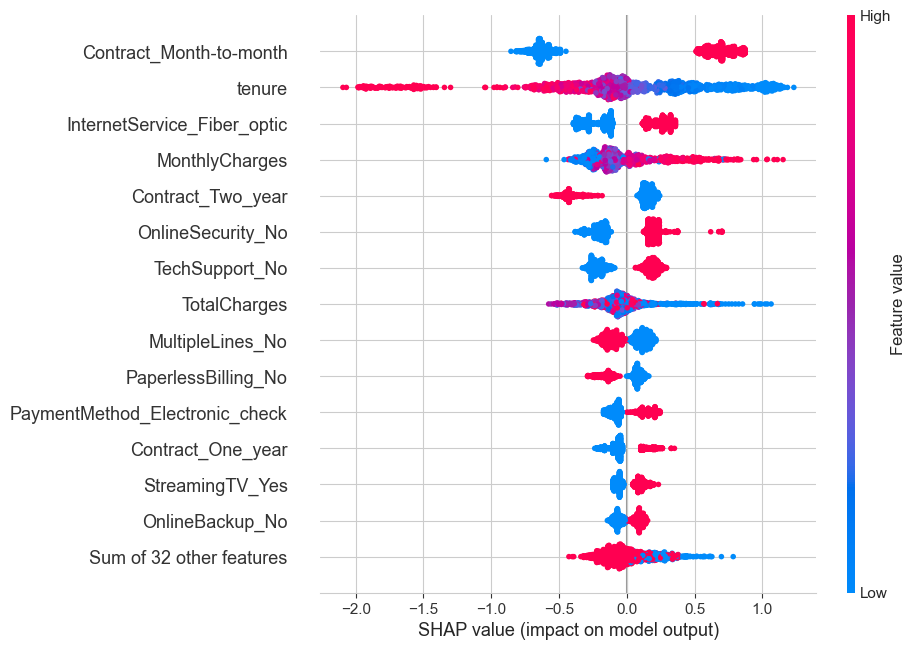

In [78]:
lgbm_explainer = shap.Explainer(best_lgbm)
lgbm_shap = lgbm_explainer(X_test)
shap.plots.beeswarm(lgbm_shap, max_display=15)

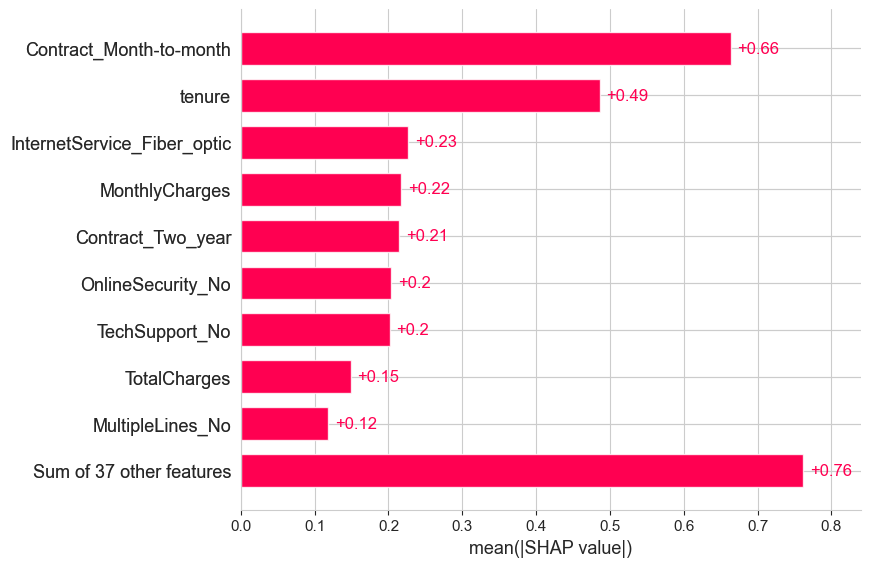

In [79]:
shap.plots.bar(lgbm_shap)

##### CatBoost

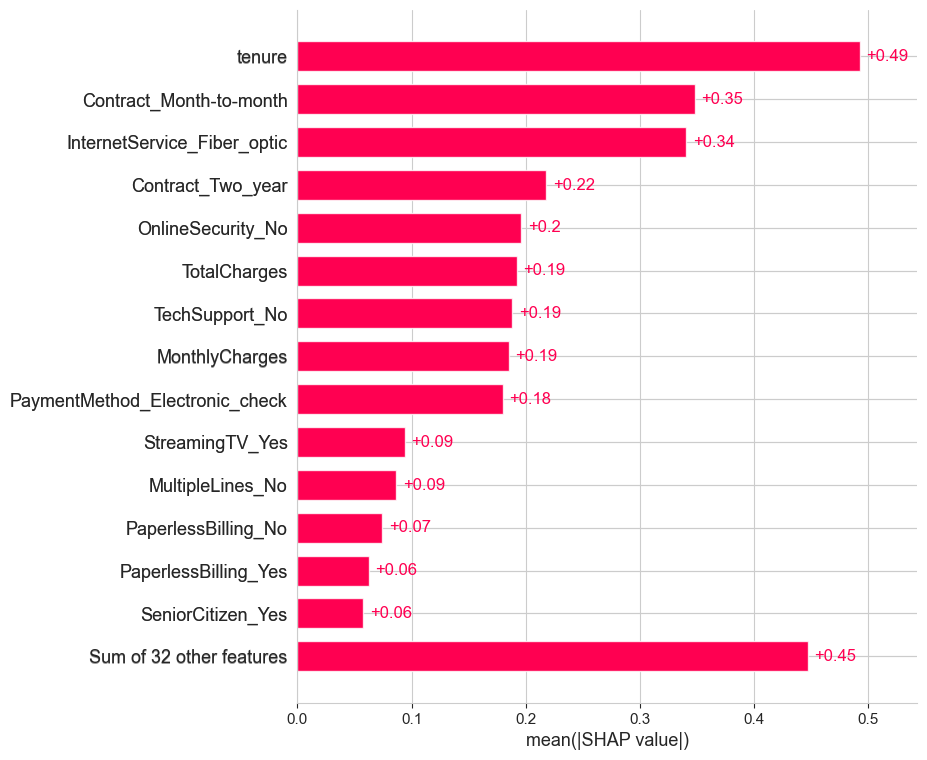

In [80]:
cb_explainer = shap.Explainer(best_cbc)
cb_shap = cb_explainer(X_test)
shap.plots.bar(cb_shap, max_display=15)

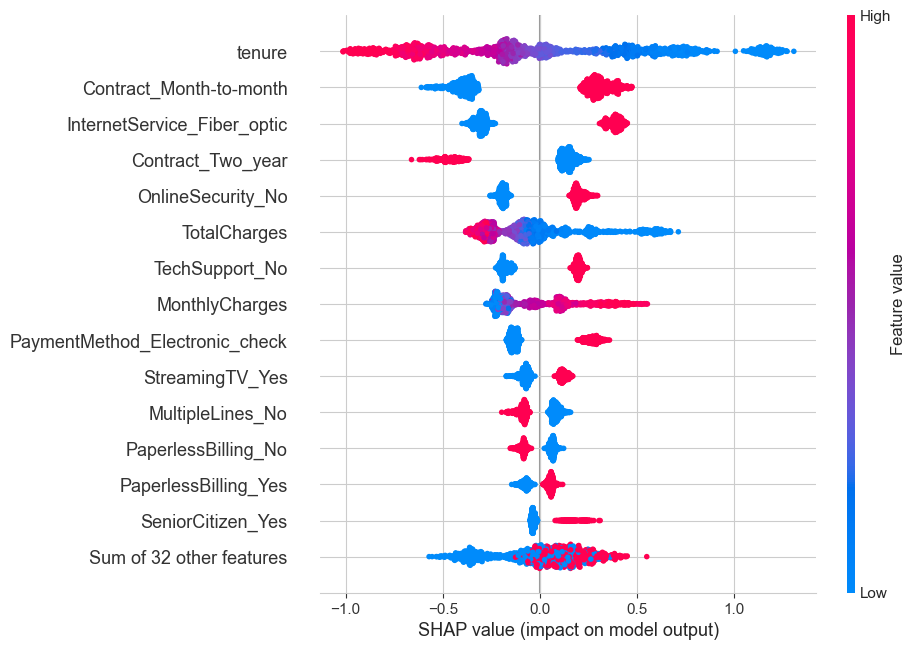

In [82]:
shap.plots.beeswarm(cb_shap, max_display=15)

##### Logistic Regression

  0%|          | 0/1407 [00:00<?, ?it/s]

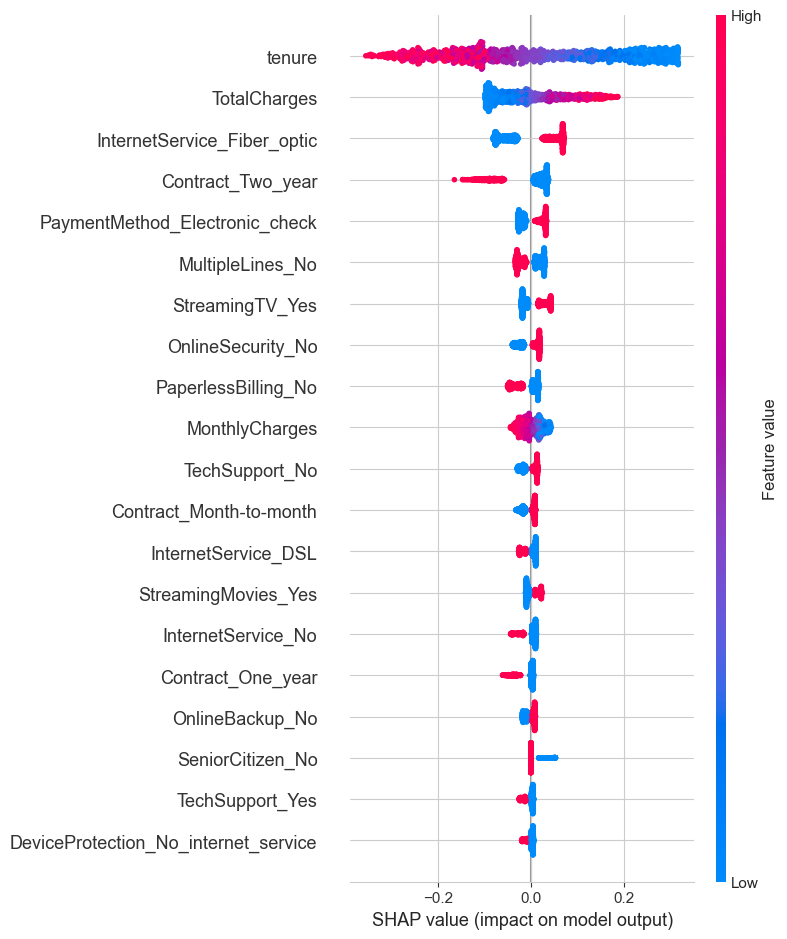

In [62]:
X_train_summary = shap.kmeans(X_train, 10)
shap_lrc_explainer = shap.KernelExplainer(
    best_lrc.predict_proba, X_train_summary
)

shap_lrc_values_test = shap_lrc_explainer.shap_values(
    X_test, l1_reg="num_features(46)"
)
shap.summary_plot(shap_lrc_values_test[:, :, 1], X_test, plot_type="dot")

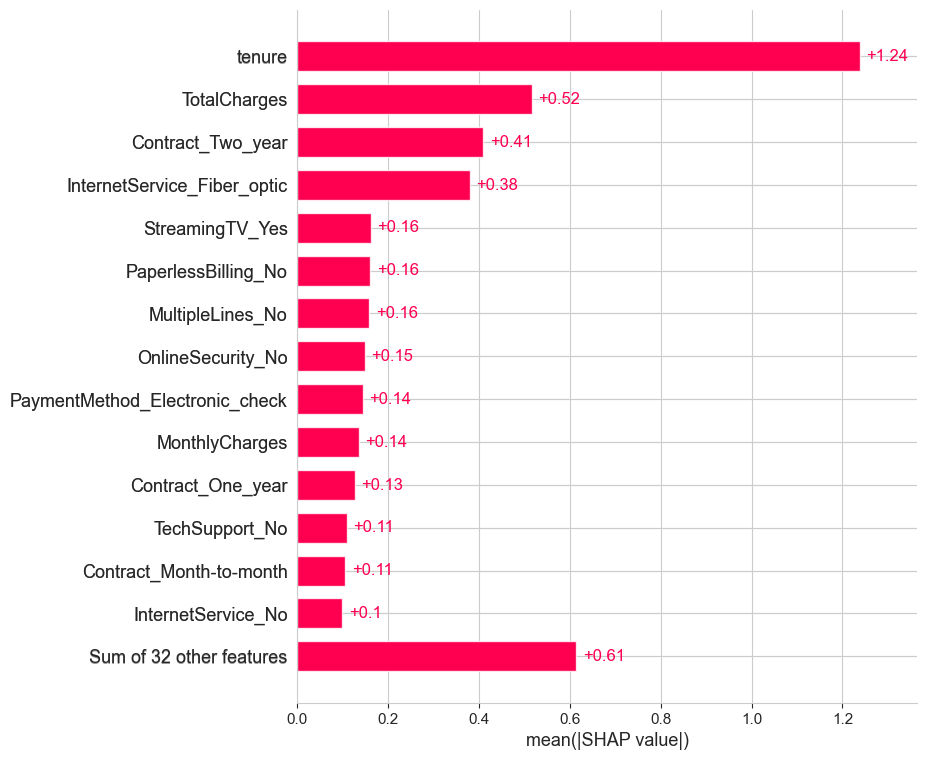

In [83]:
lrc_explainer = shap.Explainer(best_lrc, X_train)
lrc_shap = lrc_explainer(X_test)
shap.plots.bar(lrc_shap, max_display=15)

### PDP (Partial Dependence Plot)

In [38]:
from sklearn.inspection import PartialDependenceDisplay

def pdp_plot(features, models, model_names):
    num_features = len(features)
    num_models = len(models)

    colors = ['blue', 'orange', 'green']

    fig, axs = plt.subplots(nrows=num_features, ncols=num_models, figsize=(5*num_models, 2*num_features))

    for i, feature in enumerate(features):
        for j, (model, model_name, color) in enumerate(zip(models, model_names, colors)):
            ax = axs[i, j]
            PartialDependenceDisplay.from_estimator(model, X, [feature], ax=ax, line_kw={'color': color})
            ax.set_title(model_name)

    plt.tight_layout() 
    plt.show()

In [173]:
X.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No_phone_service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber_optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No_internet_service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No_internet_service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No_internet_service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No_internet_service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No_internet_service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One_year',
     

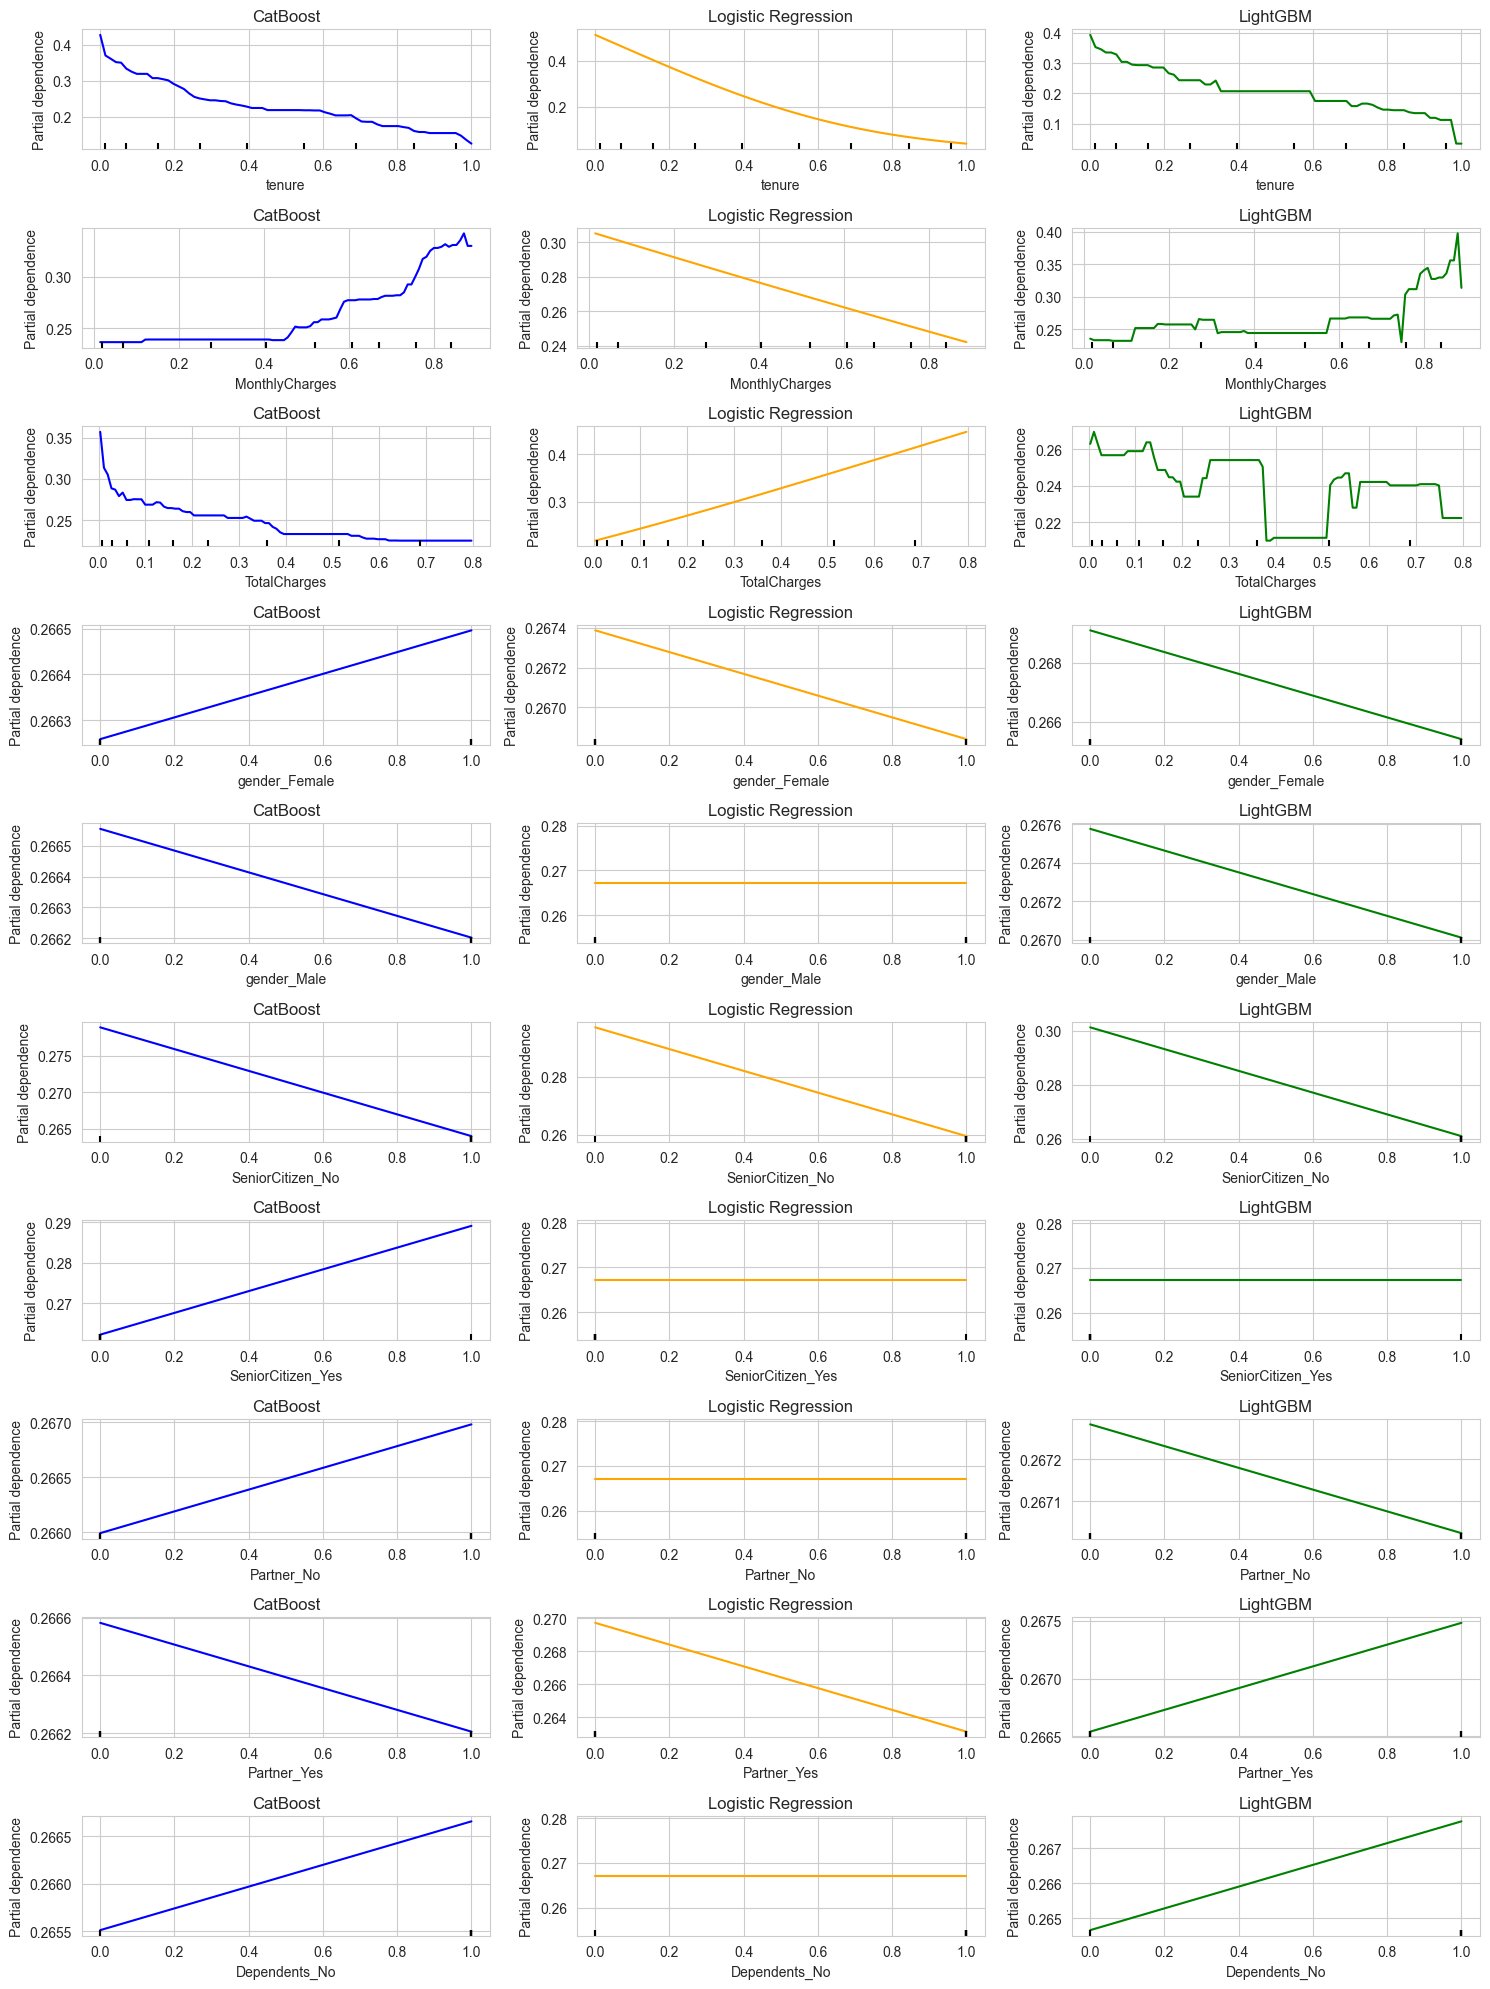

In [54]:
pdp_plot(X.iloc[:,:10].columns, [best_cbc, best_lrc, best_lgbm], ['CatBoost', 'Logistic Regression', 'LightGBM'])

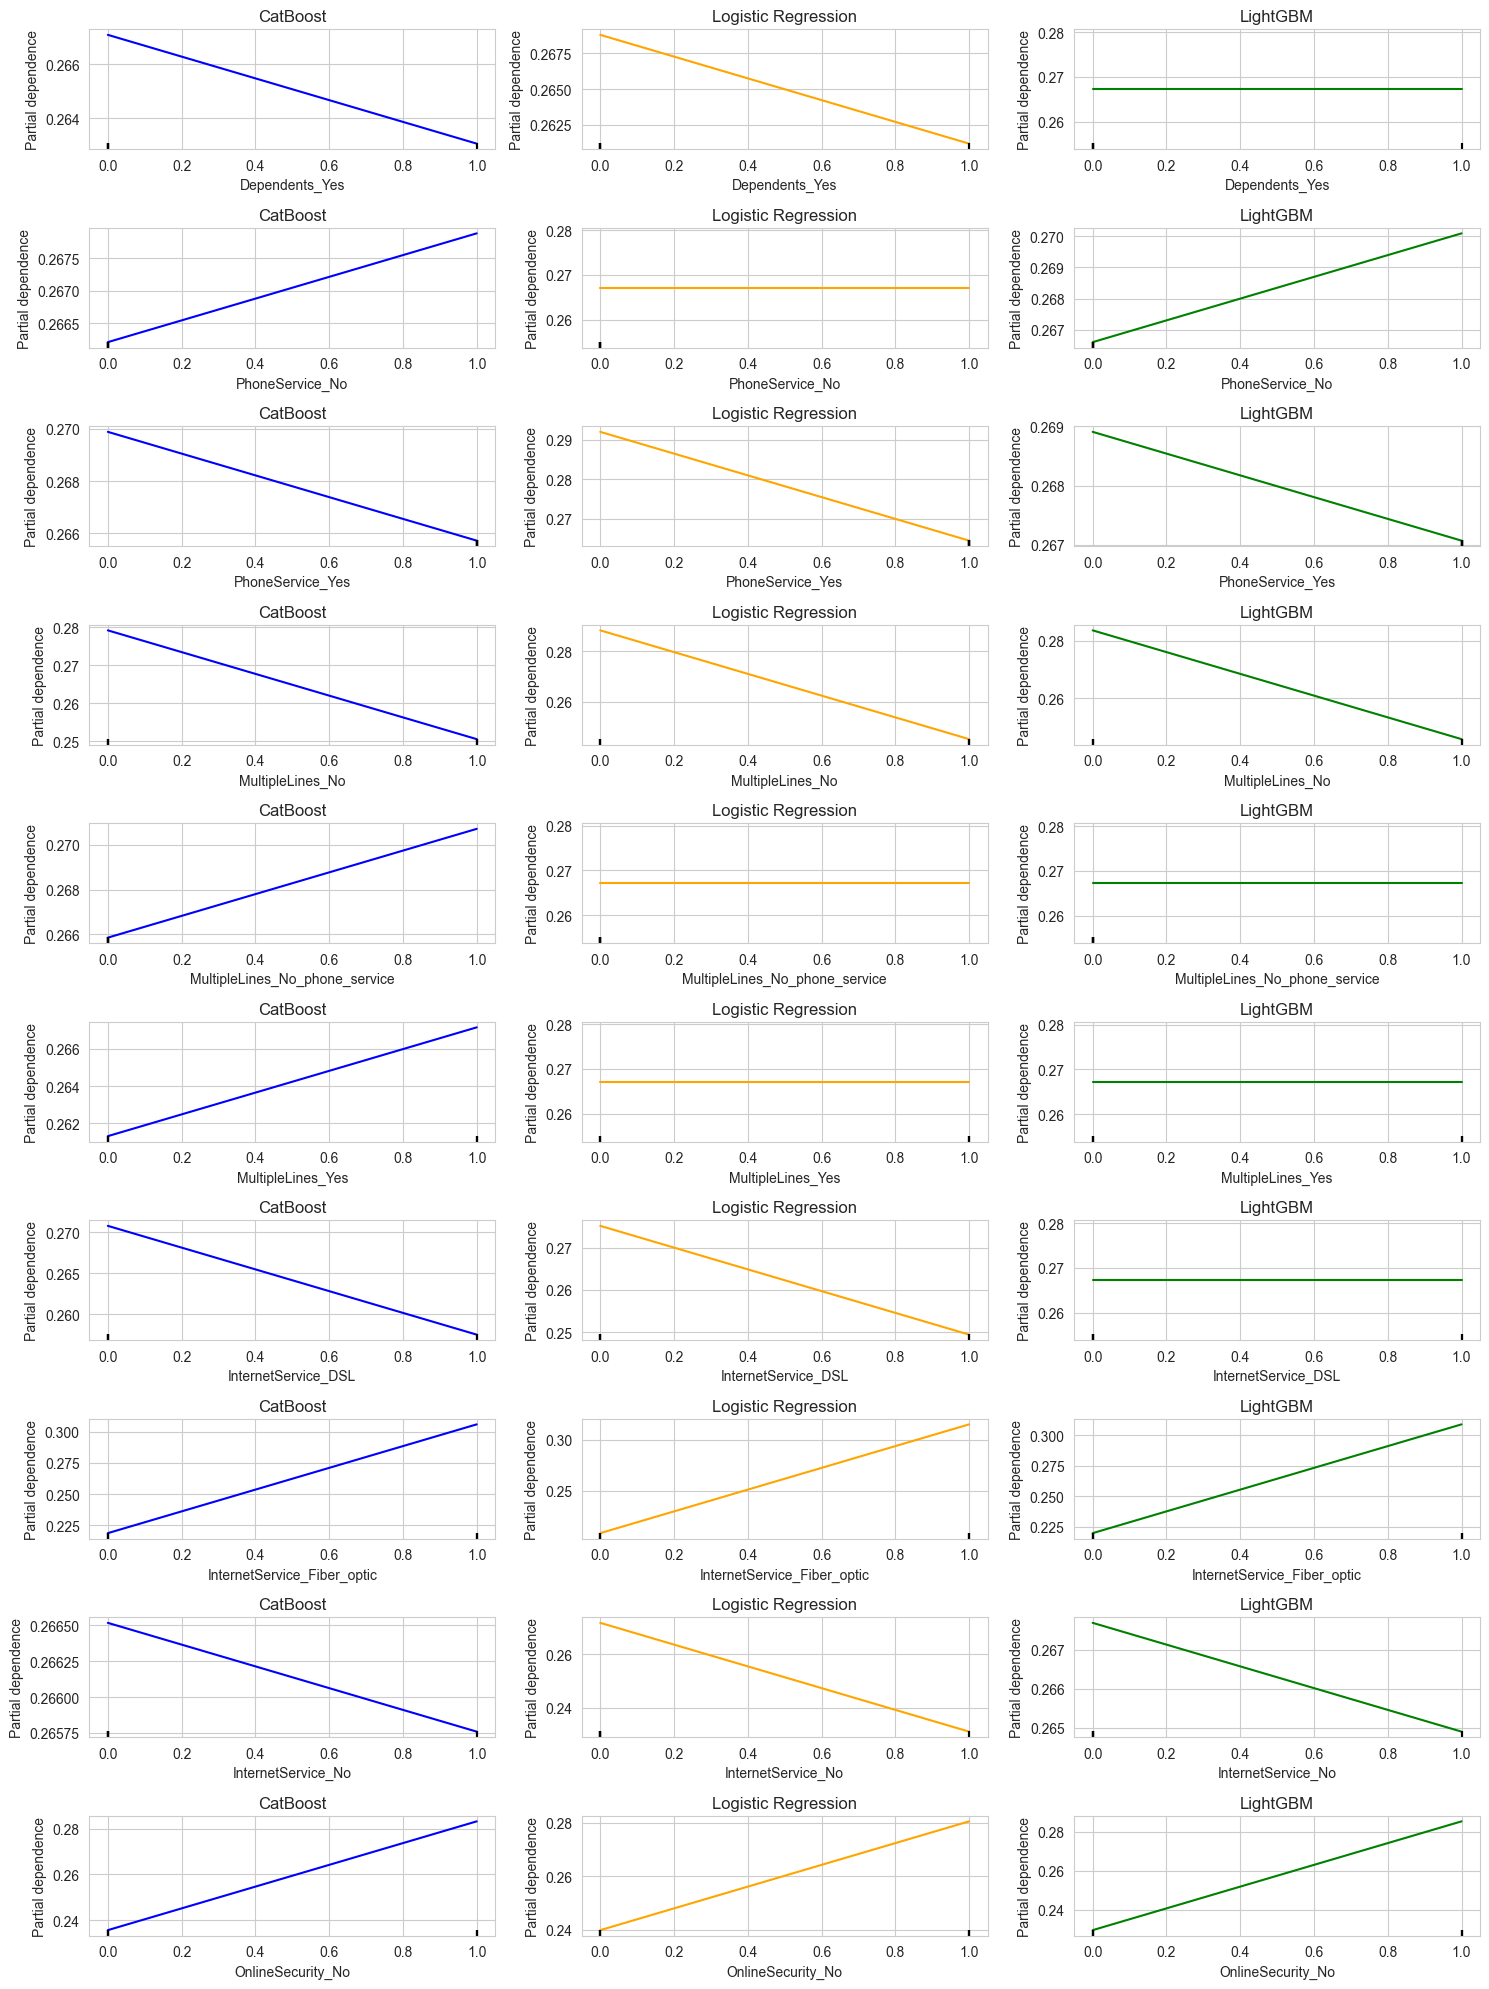

In [55]:
pdp_plot(X.iloc[:,10:20].columns, [best_cbc, best_lrc, best_lgbm], ['CatBoost', 'Logistic Regression', 'LightGBM'])

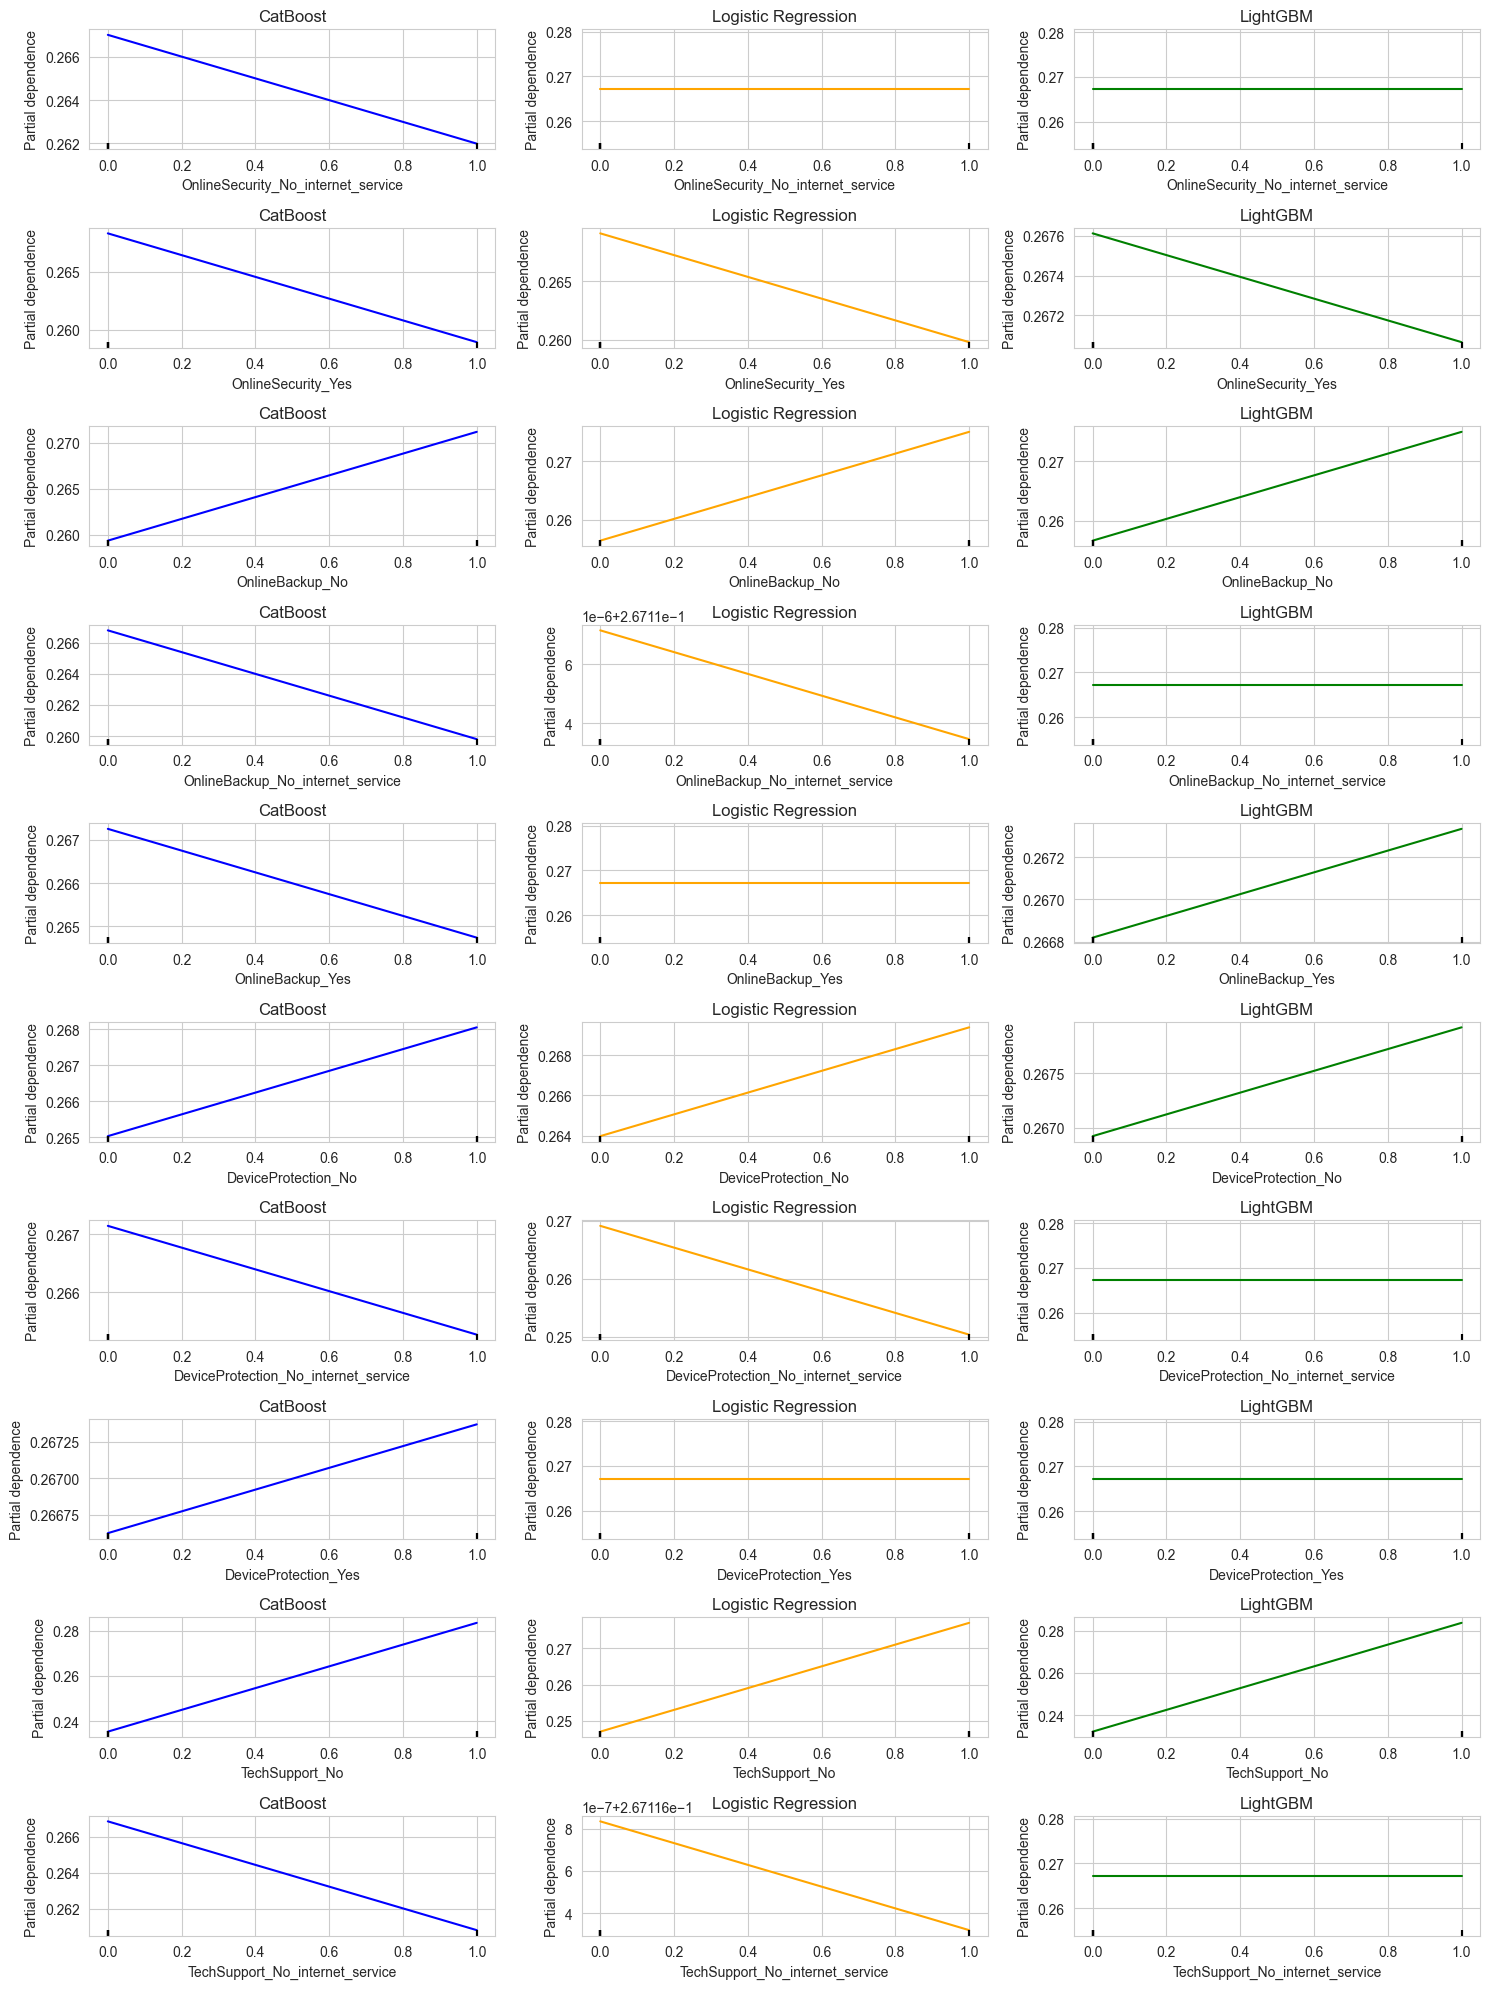

In [56]:
pdp_plot(X.iloc[:,20:30].columns, [best_cbc, best_lrc, best_lgbm], ['CatBoost', 'Logistic Regression', 'LightGBM'])

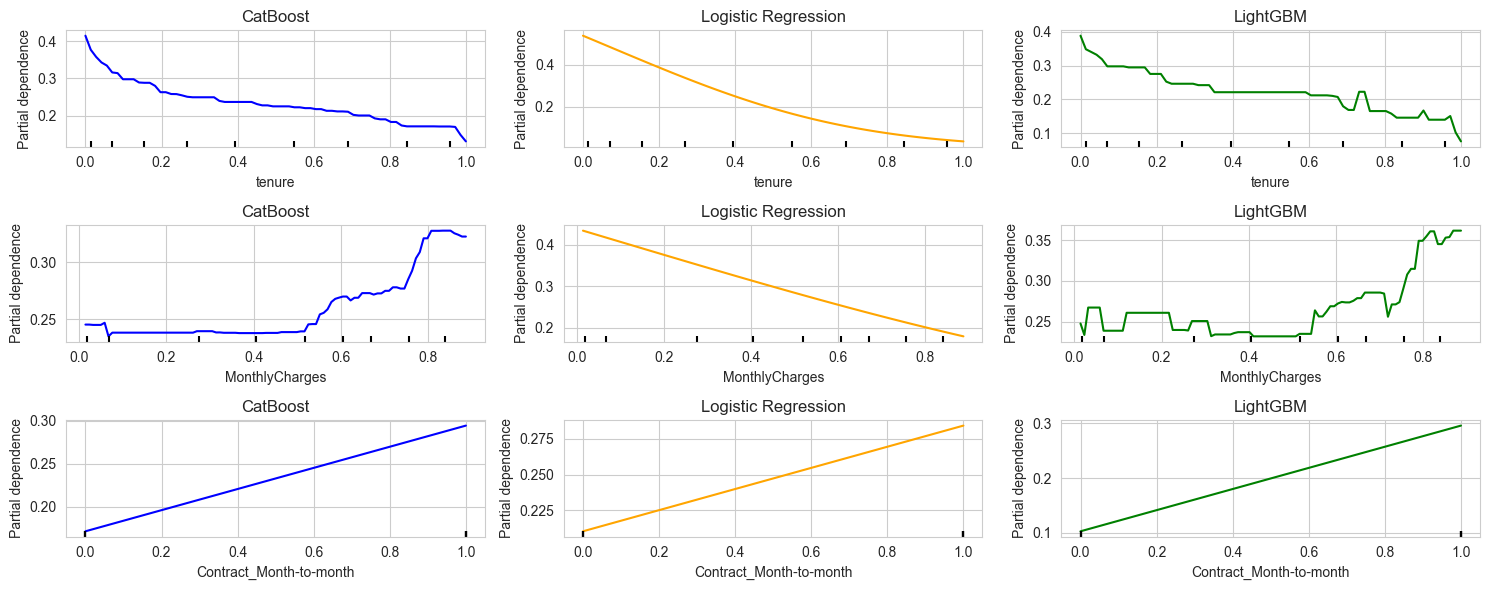

In [39]:
pdp_plot(X[['tenure', 'MonthlyCharges', 'Contract_Month-to-month']].columns, [best_cbc, best_lrc, best_lgbm], ['CatBoost', 'Logistic Regression', 'LightGBM'])

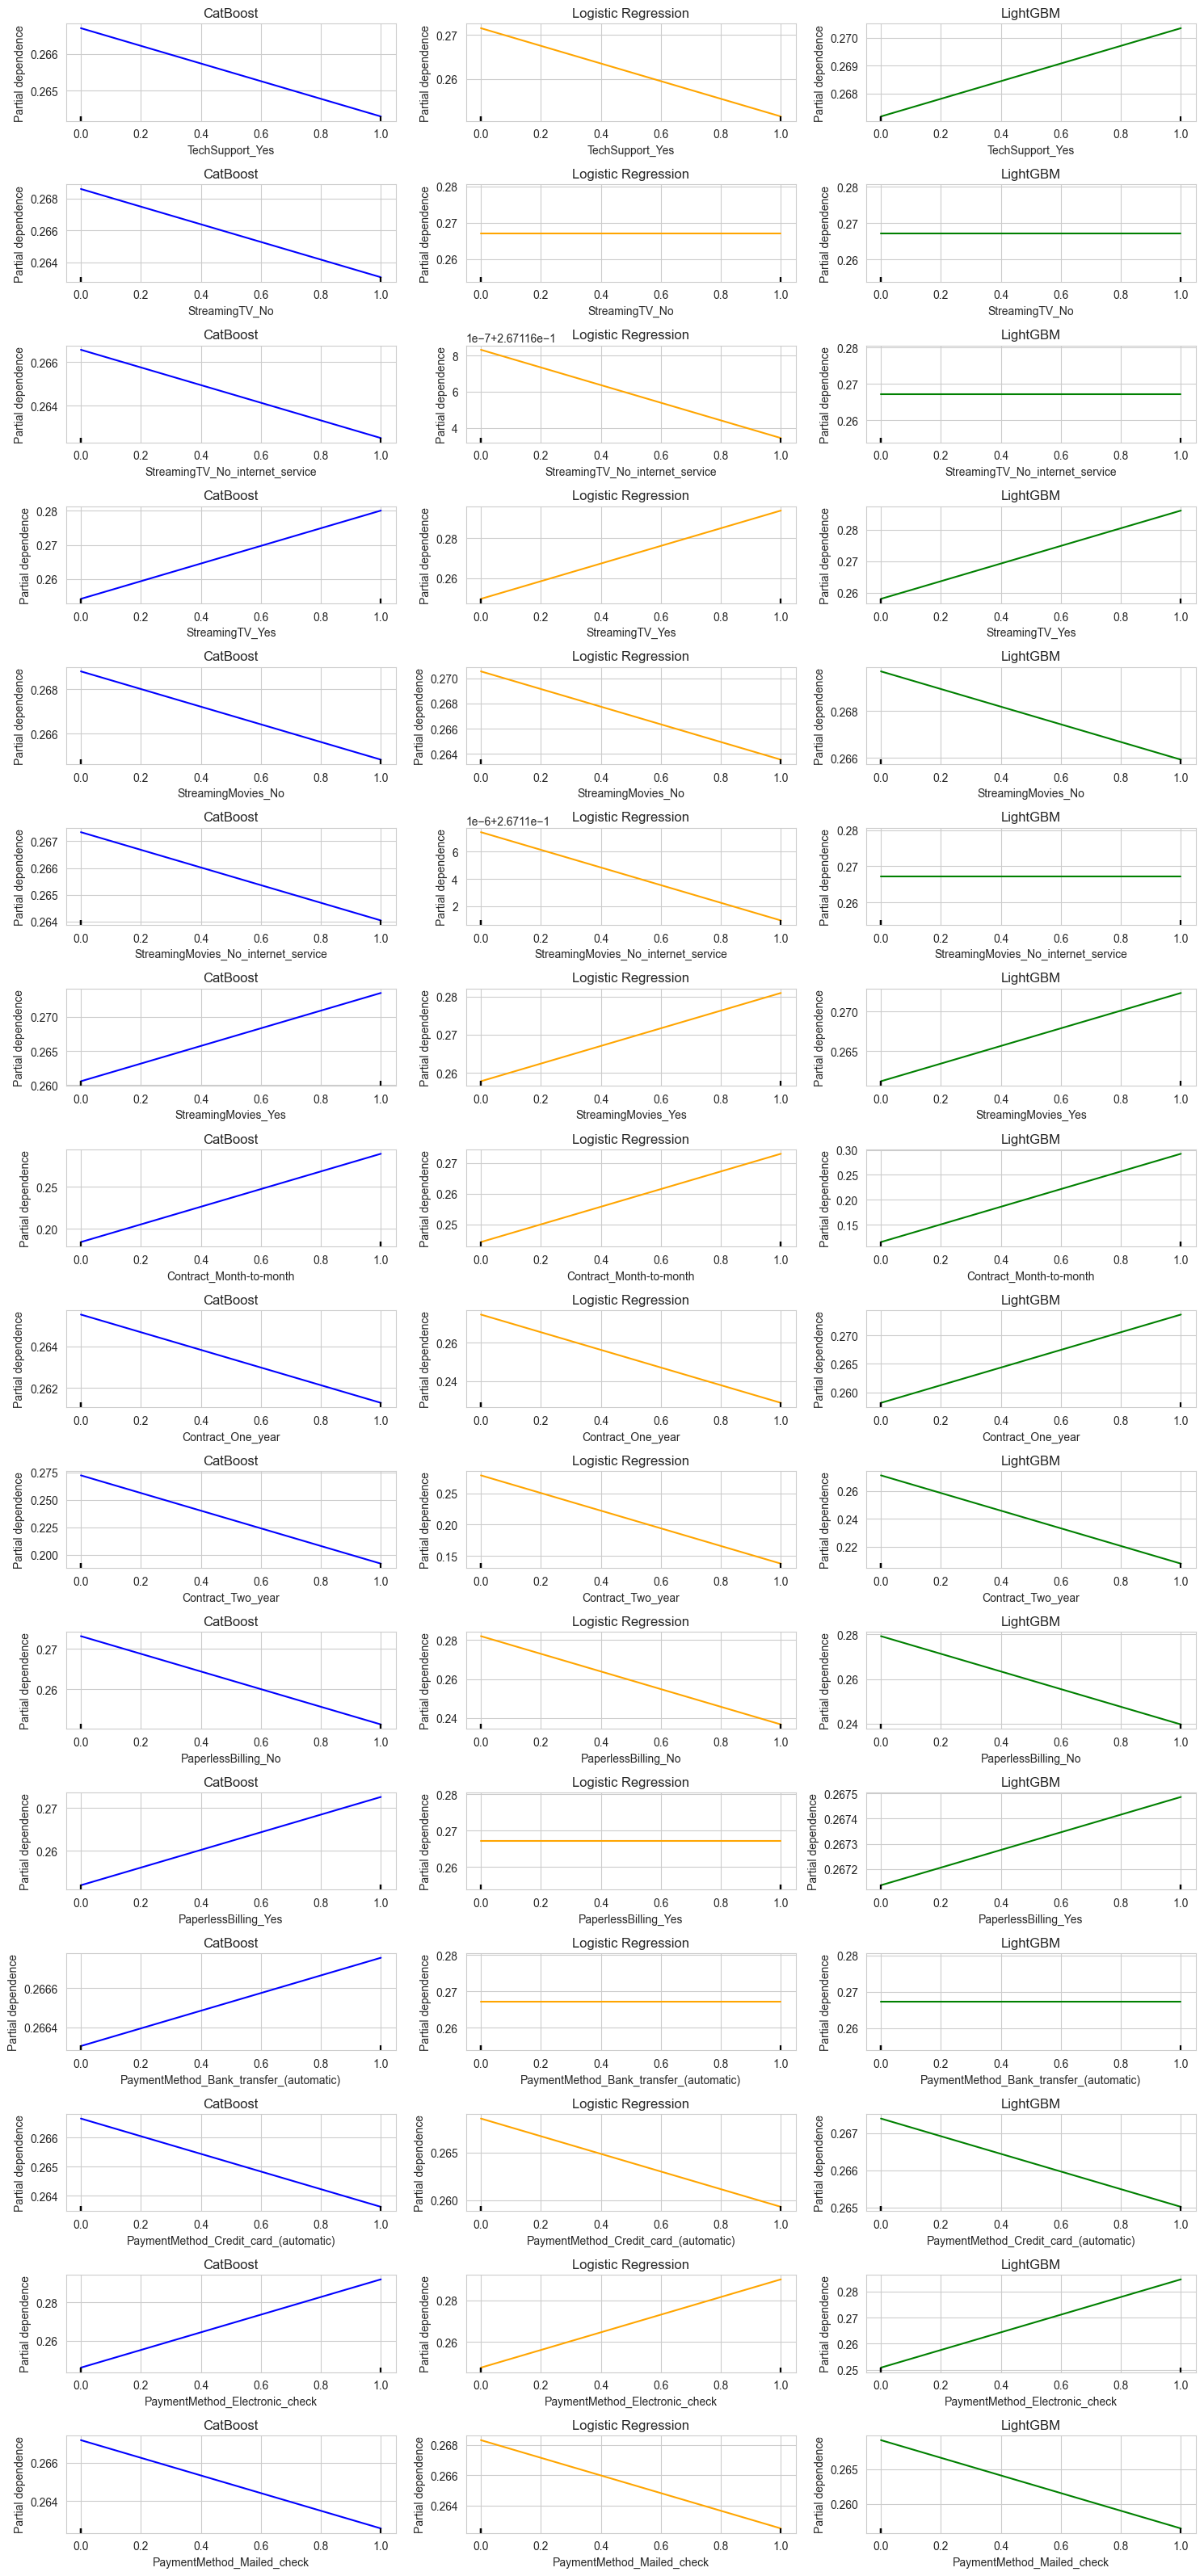

In [57]:
pdp_plot(X.iloc[:,30:].columns, [best_cbc, best_lrc, best_lgbm], ['CatBoost', 'Logistic Regression', 'LightGBM'])

### Permutation & Feature Importance

#### Feature Importance

In [58]:
cb_feat_imp = best_cbc.feature_importances_
lrc_feat_imp = np.abs(best_lrc.coef_[0])
lgbm_feat_imp = best_lgbm.feature_importances_

feat_imp_df = pd.DataFrame({
    'Features': X_train.columns,
    'CatBoost': cb_feat_imp,
    'Logistic Regression': lrc_feat_imp,
    'LightGBM': lgbm_feat_imp,
    
}).sort_values(['CatBoost', 'Logistic Regression', 'LightGBM'], ascending=False).reset_index(drop=True)

feat_imp_df.style.format(
    '{:.2f}%', subset=['CatBoost', 'Logistic Regression', 'LightGBM']).\
    bar(subset=['CatBoost', 'Logistic Regression', 'LightGBM'], color='#4EF', width=60
)

#### Permutation Importance

In [59]:
cbc_perm_imp = inspection.permutation_importance(best_cbc, X_test, y_test, n_repeats=10, scoring='balanced_accuracy')
lrc_perm_imp = inspection.permutation_importance(best_lrc, X_test, y_test, n_repeats=10, scoring='balanced_accuracy')
lgbm_perm_imp = inspection.permutation_importance(best_lgbm, X_test, y_test, n_repeats=10, scoring='balanced_accuracy')

cbc_perm_imp = cbc_perm_imp.importances_mean
lrc_perm_imp = lrc_perm_imp.importances_mean
lgbm_perm_imp = lgbm_perm_imp.importances_mean

In [60]:
perm_imp_df = pd.DataFrame({
    'feature':X.columns,
    'CatBoost':cbc_perm_imp,
    'Logistic Regression':lrc_perm_imp,
    'LightGBM':lgbm_perm_imp,
})

perm_imp_df = perm_imp_df.sort_values(['CatBoost', 'Logistic Regression', 'LightGBM'], ascending=False).reset_index(drop=True)

perm_imp_df.style.format(
                        '{:.4f}', subset=['CatBoost', 'Logistic Regression', 'LightGBM']).\
                        bar(subset=['CatBoost', 'Logistic Regression', 'LightGBM'], color='#4EF', width=60
                    )

In [61]:
payment_method_features = ['PaymentMethod_Bank_transfer_(automatic)', 'PaymentMethod_Credit_card_(automatic)', 
                           'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check']

predict_plot = info_plots.PredictPlot(
    model=best_cbc, df=X_test, feature_name="PaymentMethod - CatBoost", n_classes=1,
    model_features=X_test.columns, feature=payment_method_features
)
fig, _, _ = predict_plot.plot()
fig.show()

predict_plot = info_plots.PredictPlot(
    model=best_lrc, df=X_test, feature_name="PaymentMethod - Logistic Regression", n_classes=1,
    model_features=X_test.columns, feature=payment_method_features
)
fig, _, _ = predict_plot.plot()
fig.show()

predict_plot = info_plots.PredictPlot(
    model=best_lgbm, df=X_test, feature_name="PaymentMethod - LightGBM", n_classes=1,
    model_features=X_test.columns, feature=payment_method_features
)
fig, _, _ = predict_plot.plot()
fig.show()

obtain pred_func from the provided model.


obtain pred_func from the provided model.


obtain pred_func from the provided model.
